# Modelling 

The goal is to obtain the traffic model that gives the covariance kernel its shape.

The first model is: $x_k = x_0 + k v_0 + \frac{2n-1}{2} \epsilon$. This corresponds to the model where $x_{k+1} = x_k + v_{k+1}$ and $v_{k+1} = v_k + \epsilon$ where $\epsilon \sim \mathcal{N}(0,\sigma_\epsilon^2)$ i.e., i.i.d. acceleration model.

In [49]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt 

from scipy.stats import norm

%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
def step(xk, vk):
    ak_plus_1 = norm.rvs(loc = 0, scale = 0.02)
    vk_plus_1 = vk + ak_plus_1
    xk_plus_1 = xk + vk_plus_1
    return (xk_plus_1, vk_plus_1)

In [51]:
num_of_trajs = 200
length_of_trajs = 270
trajs = np.zeros((num_of_trajs, length_of_trajs))
trajs_v = np.zeros((num_of_trajs, length_of_trajs))
for i in range(num_of_trajs):
    xk = 0
    vk = 0
    for j in range(length_of_trajs):
        new_xk, new_vk = step(xk, vk)
        trajs[i,j] = new_xk
        trajs_v[i,j] = new_vk
        xk = new_xk
        vk = new_vk

The trajectory should be integral of a Wiener process:

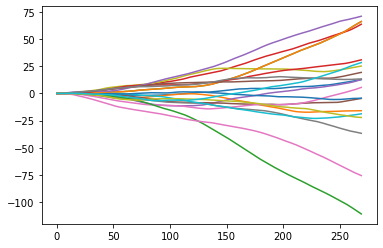

In [52]:
for i in np.random.choice(num_of_trajs, 20):
    plt.plot(trajs[i,:])

The velocity, since being integration of normal i.i.d. random variable, should be a Wiener process:

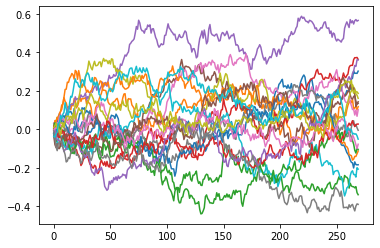

In [53]:
for i in np.random.choice(num_of_trajs, 20):
    plt.plot(trajs_v[i,:])

Let's find the covariance matrix:

In [54]:
import skfda
fdgr = skfda.FDataGrid(trajs, np.arange(trajs.shape[1]))
cov_mtrx = fdgr.cov().data_matrix[0,:,:,0]

(0.0, 269.0, 0.0, 269.0)

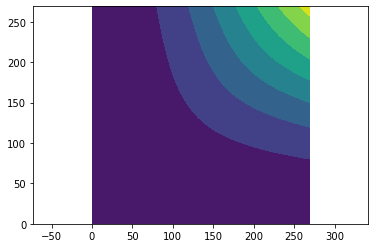

In [55]:
plt.contourf(cov_mtrx)
plt.axis('equal')

(0.0, 269.0, 0.0, 269.0)

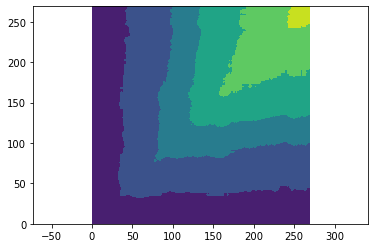

In [56]:
fdgrv = skfda.FDataGrid(trajs_v, np.arange(trajs_v.shape[1]))
cov_mtrxv = fdgrv.cov().data_matrix[0,:270,:270,0]
plt.contourf(cov_mtrxv)
plt.axis('equal')